# ***Exploratory Data Analysis (EDA) – Fraud Pattern Investigation***

In [ ]:
#LOADING THE NECESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#LOAD THE CLEAN DATASET

trans_df = pd.read_csv('../data/transactions_cleaned.csv')

In [25]:
#SHOW TOTAL NUMBER OF FRAUD CASES

total_fraud_cases=(trans_df['is_fraud']==1).sum()

print(f'Total number of fraud cases {total_fraud_cases}')

Total number of fraud cases 2145


In [26]:
#IS FRAUD RARE OR COMMON?

fraud_percentage=(total_fraud_cases/len(trans_df)*100)

if fraud_percentage<1:
    print(f'Fraud is rare, with only {fraud_percentage:.2f}% of transactions being fraudulent.')
else:
    print(f'Fraud is common, with {fraud_percentage:.2f}% of transactions being fraudulent.')

Fraud is rare, with only 0.39% of transactions being fraudulent.


In [27]:
#DO FRAUD TRANSACTION HAVE HIGHER AMOUNTS?

average_fraud_amount=trans_df[trans_df['is_fraud']==1]['amt'].mean()

average_nonfraud_amount=trans_df[trans_df['is_fraud']==0]['amt'].mean()

print(f'Average amount for fraudulent transactions: ${average_fraud_amount:.2f}')
print(f'Average amount for non-fraudulent transactions: ${average_nonfraud_amount:.2f}')

Average amount for fraudulent transactions: $528.36
Average amount for non-fraudulent transactions: $67.61


In [41]:
#CONVERTING THE DATE COLUMNS TO DATETIME FORMAT

trans_df['trans_datetime']=pd.to_datetime(trans_df['trans_datetime'])

trans_df['trans_date']=pd.to_datetime(trans_df['trans_date'])

trans_df['trans_day']=trans_df['trans_date'].dt.day_name()

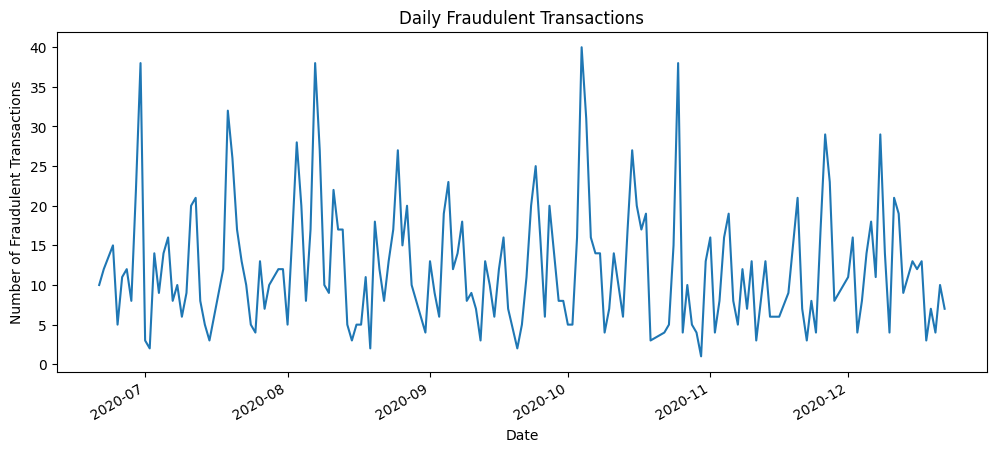

In [31]:
#DISPLAY ANY UNUSAL SPIKES IN TRANSACTION AMOUNTS

fraud_date = trans_df[trans_df['is_fraud']==1].groupby('trans_date').size()

fraud_date.plot(figsize=(12,5))
plt.title('Daily Fraudulent Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

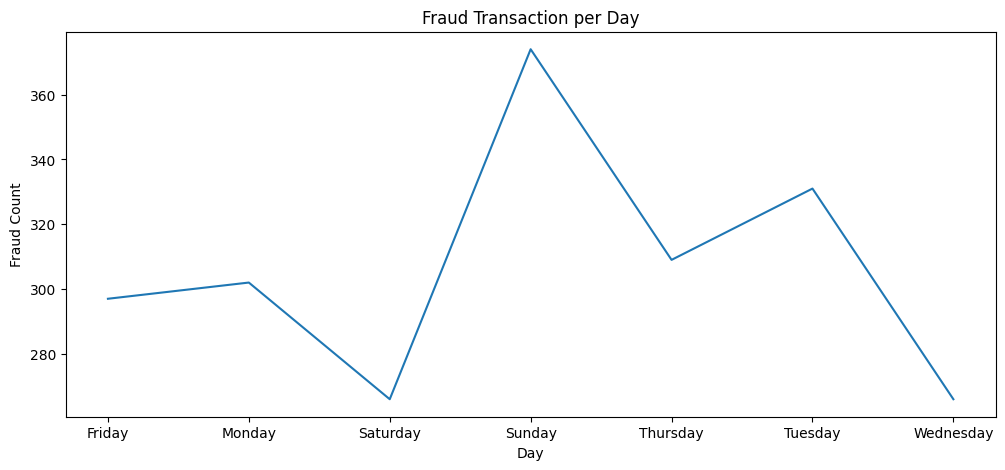

In [ ]:
#DISPLAY ANY UNUSUAL SPIKES IN TRANSACTION AMOUNTS BY DAY OF THE WEEKs

fraud_day = trans_df[trans_df['is_fraud']==1].groupby('trans_day').size()

fraud_day.plot(figsize=(12,5))
plt.title("Fraud Transaction per Day")
plt.xlabel("Day")
plt.ylabel("Fraud Count")
plt.show()

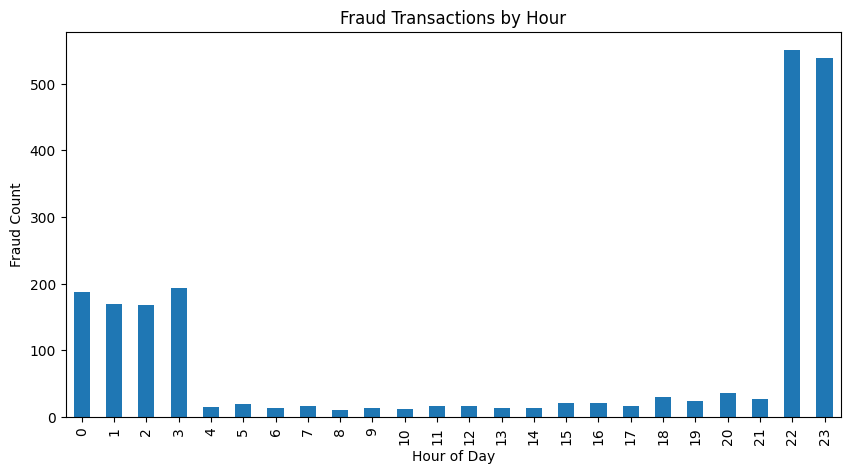

In [42]:
#DISPLAY ANY UNUSUAL SPIKES IN TRANSACTION AMOUNTS BY HOUR OF THE DAY

trans_df['trans_hour']=trans_df['trans_datetime'].dt.hour

fraud_hour = trans_df[trans_df['is_fraud']==1].groupby('trans_hour').size()

fraud_hour.plot(kind='bar',figsize=(10,5))
plt.title("Fraud Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Count")
plt.show()


In [ ]:
#IDENTIFY PEAK HOURS FOR FRAUDULENT TRANSACTIONS

peak_hours=fraud_hour.max()

print(f'Peak hours for fraudulent transactions: {peak_hours}')

Peak hours for fraudulent transactions: 550


In [35]:
#AT WHAT TIME OF DAY DO FRAUDULENT TRANSACTIONS OCCUR MORE?

time_of_fraud=trans_df[trans_df['is_fraud']==1]

time_period
Day       186
Night    1959
dtype: int64


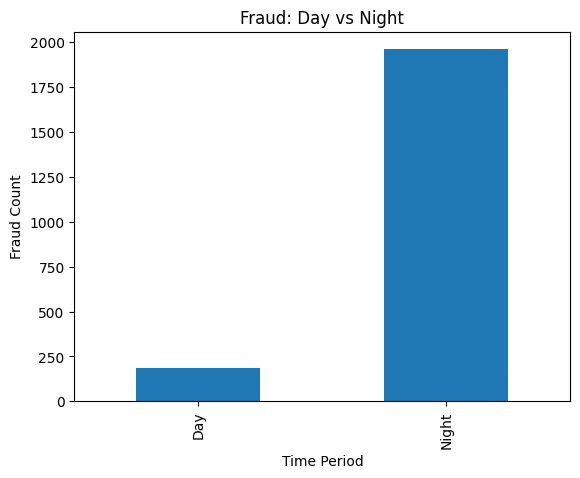

In [ ]:
#CREATE A NEW COLUMN TO CLASSIFY TRANSACTIONS AS DAY OR NIGHT

trans_df['time_period'] = trans_df['trans_hour'].apply(lambda x: 'Night' if x>=18 or x<6 else 'Day')
day_night = trans_df[trans_df['is_fraud']==1].groupby('time_period').size()
print(day_night)

day_night.plot(kind='bar')
plt.title("Fraud: Day vs Night")
plt.xlabel("Time Period")
plt.ylabel("Fraud Count")
plt.show()


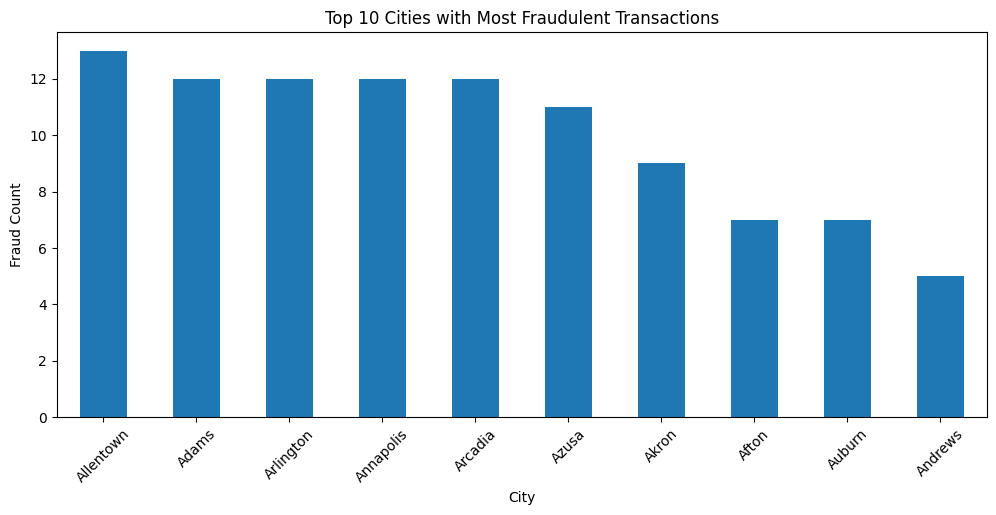

In [38]:
#WHICH CITIES HAVE THE MOST FRAUDULENT TRANSACTIONS?

fraud_city = trans_df[trans_df['is_fraud']==1].groupby('city').size().head(10).sort_values(ascending=False)
fraud_city.plot(kind='bar', figsize=(12,5))
plt.title("Top 10 Cities with Most Fraudulent Transactions")
plt.xlabel("City")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()

In [39]:
#WHO ARE THE CUSTOMERS WITH THE MOST FRAUDULENT TRANSACTIONS?

trans_df['fullname']=trans_df['firstname']+' '+trans_df['lastname']

fraud_customer =trans_df[trans_df['is_fraud']==1].groupby('fullname').size().sort_values(ascending=False)

print("Top 10 Customers with Most Fraudulent Transactions:")
print(fraud_customer.head(10))

Top 10 Customers with Most Fraudulent Transactions:
fullname
Mary Williams        19
Gina Grimes          18
Elizabeth Mckee      16
Mary Humphrey        16
Lisa Garcia          16
Ana Howell           16
Kayla Sutton         15
Amanda Fitzgerald    15
Kyle Wright          15
Lauren Moreno        15
dtype: int64


In [40]:
#TO SAVE THE CLEANED DATAFRAME TO A NEW CSV FILE NAMED 'transactions_cleaned.csv' IN THE 'data' FOLDER

trans_df.to_csv('../data/transactions_cleaned.csv', index=False)